**Problem Statement**

We will be trying to understand sentiment of tweets about the company Apple. By using the twitter data we can hope to understand the public perception a bit better.

Our challenge is to see if we can correctly classify tweets as being either positive or negative.

Problem Statement:
•	Correctly classify the tweets as being positive or negative.

In [1]:

import numpy as np 
import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import string 
import matplotlib


# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('movie_reviews')

In [43]:
nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('movie_reviews')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.18.5
Pandas version: 1.0.5
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.5
Matplotlib version: 3.2.2


In [3]:
Apple_tweets = pd.read_csv("Apple_tweets.csv")

In [4]:
## Checking the first 5 rows of the dataset

Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


## Basic Exploration in Text Mining

In [5]:
x="@GreatLearners - https://gl.in In 2020 all airlines had to shut their operations due to COVID19."


In [9]:
x.split()

['@GreatLearners',
 '-',
 'https://gl.in',
 'In',
 '2020',
 'all',
 'airlines',
 'had',
 'to',
 'shut',
 'their',
 'operations',
 'due',
 'to',
 'COVID19.']

In [10]:
x.lower()

'@greatlearners - https://gl.in in 2020 all airlines had to shut their operations due to covid19.'

In [11]:
x.upper()

'@GREATLEARNERS - HTTPS://GL.IN IN 2020 ALL AIRLINES HAD TO SHUT THEIR OPERATIONS DUE TO COVID19.'

In [12]:
words = x.split()
words

['@GreatLearners',
 '-',
 'https://gl.in',
 'In',
 '2020',
 'all',
 'airlines',
 'had',
 'to',
 'shut',
 'their',
 'operations',
 'due',
 'to',
 'COVID19.']

In [17]:
' '.join(x.split())

'@GreatLearners - https://gl.in In 2020 all airlines had to shut their operations due to COVID19.'

In [21]:
lst=[5,4,10,6,30]

[a**2 for a in lst if a>4] #list comprehension

[25, 100, 36, 900]

In [24]:
[print(word) for word in x.split() if word not in ['all','if','is']]

@GreatLearners
-
https://gl.in
In
2020
airlines
had
to
shut
their
operations
due
to
COVID19.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Number of words - Method1

In [25]:
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [26]:
lst = Apple_tweets['Tweet'].tolist()
lst[0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [27]:
lst[0].split()

['I',
 'have',
 'to',
 'say,',
 'Apple',
 'has',
 'by',
 'far',
 'the',
 'best',
 'customer',
 'care',
 'service',
 'I',
 'have',
 'ever',
 'received!',
 '@Apple',
 '@AppStore']

In [28]:
len(lst[0].split())

19

In [31]:
[len(sentence.split()) for sentence in lst]

[19,
 10,
 3,
 11,
 16,
 13,
 27,
 8,
 15,
 27,
 10,
 7,
 17,
 24,
 16,
 24,
 25,
 9,
 15,
 19,
 22,
 20,
 14,
 9,
 5,
 15,
 12,
 8,
 7,
 24,
 9,
 13,
 19,
 6,
 9,
 22,
 14,
 16,
 5,
 21,
 17,
 22,
 12,
 7,
 15,
 16,
 20,
 12,
 20,
 18,
 4,
 4,
 22,
 18,
 11,
 22,
 22,
 18,
 22,
 11,
 17,
 20,
 17,
 12,
 28,
 20,
 16,
 16,
 17,
 20,
 6,
 7,
 22,
 19,
 17,
 17,
 10,
 21,
 17,
 20,
 21,
 21,
 20,
 15,
 19,
 20,
 17,
 15,
 21,
 12,
 10,
 16,
 20,
 19,
 3,
 21,
 19,
 15,
 8,
 21,
 19,
 21,
 19,
 22,
 5,
 14,
 15,
 15,
 22,
 15,
 20,
 15,
 10,
 18,
 21,
 22,
 4,
 10,
 12,
 14,
 20,
 20,
 5,
 13,
 10,
 14,
 11,
 16,
 11,
 21,
 10,
 17,
 8,
 3,
 16,
 16,
 9,
 22,
 9,
 19,
 17,
 7,
 20,
 10,
 27,
 9,
 6,
 24,
 12,
 25,
 18,
 16,
 8,
 6,
 13,
 21,
 25,
 24,
 9,
 12,
 16,
 18,
 7,
 6,
 10,
 12,
 9,
 7,
 11,
 16,
 3,
 10,
 2,
 3,
 8,
 5,
 14,
 10,
 27,
 17,
 3,
 17,
 20,
 6,
 13,
 21,
 23,
 15,
 14,
 13,
 12,
 23,
 11,
 6,
 3,
 6,
 8,
 4,
 20,
 17,
 8,
 7,
 18,
 6,
 4,
 12,
 21,
 18,
 7,
 21,
 24

In [30]:
Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()] # dic={key:value,key:value} ()
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


### Number of words - Method2

In [32]:
x= Apple_tweets['Tweet'][0]
len(x.split(" "))

19

In [33]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda sentence: len(sentence.split()))
Apple_tweets.head()

,Tweet,Avg,totalwords,word_count
0,"I have to say, Apple has by far the best custo...",2.0,19,19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,10,10
2,LOVE U @APPLE,1.8,3,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,11,11
4,.@apple has the best customer service. In and ...,1.8,16,16


### Number of Characters- including spaces

In [34]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count
0,"I have to say, Apple has by far the best custo...",2.0,19,19,101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,10,10,60
2,LOVE U @APPLE,1.8,3,3,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,11,11,91
4,.@apple has the best customer service. In and ...,1.8,16,16,82


In [35]:
Apple_tweets['Tweet'][0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [36]:
len(Apple_tweets['Tweet'][0])

101

In [37]:
#without spaces
Apple_tweets['Tweet'].apply(lambda x: sum([len(word) for word in x.split()]))

0       83
1       51
2       11
3       80
4       67
        ..
1176    11
1177    64
1178    29
1179    54
1180    42
Name: Tweet, Length: 1181, dtype: int64

### Average Word Length

In [38]:
83/19

4.368421052631579

In [39]:
def avg_word(sentence):
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) 


In [40]:
Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Number of stop Words

In [44]:
from nltk.corpus import stopwords

In [45]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Number of special character

In [47]:
Apple_tweets['Tweet'].apply(lambda x: [word for word in x.split() if word.startswith('#')])

0                        []
1             [#ThanxApple]
2                        []
3       [#apple, #iphone5S]
4                        []
               ...         
1176                     []
1177                     []
1178                     []
1179                     []
1180                     []
Name: Tweet, Length: 1181, dtype: object

In [48]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [52]:
Apple_tweets['Tweet'].apply(lambda x: re.findall(r'[0-9]',x))

0              []
1             [7]
2              []
3       [5, 5, 4]
4          [1, 0]
          ...    
1176           []
1177           []
1178           []
1179           []
1180           []
Name: Tweet, Length: 1181, dtype: object

In [53]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Number of Uppercase Words

In [55]:
Apple_tweets['Tweet'].apply(lambda x: [x for x in x.split() if x.isupper()])

0                                                  [I, I]
1                                                      []
2                                       [LOVE, U, @APPLE]
3                                               [5S!!!!!]
4                                                      []
                              ...                        
1176                                                   []
1177    [WHY, CANT, I, SEE, PICTURES, ON, MY, TL, IM, ...
1178                             [@APPLE, YOU, COWS, YOU]
1179                                                  [I]
1180                                                   []
Name: Tweet, Length: 1181, dtype: object

In [54]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Letters

In [57]:
Apple_tweets['Tweet'].apply(lambda x: re.findall(r'[A-Z]',x))

0                                      [I, A, I, A, A, S]
1                                         [O, S, T, A, A]
2                          [L, O, V, E, U, A, P, P, L, E]
3                             [T, P, S, S, X, H, J, C, U]
4                                                     [I]
                              ...                        
1176                                                   []
1177    [W, H, Y, C, A, N, T, I, I, N, G, S, E, E, P, ...
1178    [A, P, P, L, E, Y, O, U, I, N, G, C, O, W, S, ...
1179                                               [I, I]
1180                                                  [G]
Name: Tweet, Length: 1181, dtype: object

In [56]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


## Removing special characters

In [58]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

Apple_tweets

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter
0,I have to say Apple has by far the best custom...,2.0,19,19,101,4.368421,6,0,0,2,6
1,iOS 7 is so fricking smooth beautiful ThanxAp...,2.0,10,10,60,5.100000,2,1,1,0,5
2,LOVE U APPLE,1.8,3,3,13,3.666667,0,0,0,3,10
3,Thank you apple loving my new iPhone 5S apple...,1.8,11,11,91,7.272727,2,2,3,1,9
4,apple has the best customer service In and out...,1.8,16,16,82,4.187500,8,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1176,freak apple,-2.0,2,2,12,5.500000,0,0,0,0,0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0,15,15,78,4.266667,0,0,0,13,52
1178,APPLE YOU freakING COWS freak YOU,-2.0,6,6,34,4.833333,0,0,0,4,18
1179,apple I hate you why is my phone not working I...,-2.0,15,15,68,3.600000,7,0,0,1,2


## Converting to lowercase

In [59]:
temp=Apple_tweets.iloc[1177,0]
temp

'WHY CANT I freakING SEE PICTURES ON MY TL IM ANNOYED freak YOU TWITTER APPLE'

In [60]:
temp.lower()

'why cant i freaking see pictures on my tl im annoyed freak you twitter apple'

In [61]:
## Converting all the words to lower case

Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: x.lower()) #Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter
0,i have to say apple has by far the best custom...,2.0,19,19,101,4.368421,6,0,0,2,6
1,ios 7 is so fricking smooth beautiful thanxap...,2.0,10,10,60,5.100000,2,1,1,0,5
2,love u apple,1.8,3,3,13,3.666667,0,0,0,3,10
3,thank you apple loving my new iphone 5s apple...,1.8,11,11,91,7.272727,2,2,3,1,9
4,apple has the best customer service in and out...,1.8,16,16,82,4.187500,8,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1176,freak apple,-2.0,2,2,12,5.500000,0,0,0,0,0
1177,why cant i freaking see pictures on my tl im a...,-2.0,15,15,78,4.266667,0,0,0,13,52
1178,apple you freaking cows freak you,-2.0,6,6,34,4.833333,0,0,0,4,18
1179,apple i hate you why is my phone not working i...,-2.0,15,15,68,3.600000,7,0,0,1,2


In [62]:
Apple_tweets['Avg'].value_counts()

 0.0    337
-0.2    127
 0.2    115
-0.4     84
-0.8     76
-1.0     72
-0.6     72
 0.4     50
 0.6     44
-1.2     39
 0.8     33
 1.0     25
-1.4     23
-1.8     22
-2.0     17
 1.2     11
-1.6      9
 1.4      9
 1.6      9
 1.8      5
 2.0      2
Name: Avg, dtype: int64

# Using: nltk.NaiveBayesClassifier

In [63]:
## We are defining a function to convert the 'Avg' column into a column with two classes which will be treated as the
## target variable

def Tweet(x): #naming the function to be 'Tweet' which will take an input 'x'
    if x >= 0: # initialising a conditional statement for the input greater than or equal to 0
        return "Positive" # if the conditional statement is satisfied, the function will return the string 'Positive'
    else: return "Negative" # if the conditional statement is not satisfied, the function will return the string 'Negative'

In [64]:
# Applying the defined function on the column 'Avg' and creating a new column called 'Sentiment'
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

# Dropping the 'Avg' column from the data frame
Apple_tweets.drop("Avg",axis=1,inplace=True)

In [65]:
Apple_tweets

,Tweet,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,i have to say apple has by far the best custom...,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 is so fricking smooth beautiful thanxap...,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u apple,3,3,13,3.666667,0,0,0,3,10,Positive
3,thank you apple loving my new iphone 5s apple...,11,11,91,7.272727,2,2,3,1,9,Positive
4,apple has the best customer service in and out...,16,16,82,4.187500,8,0,2,0,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
1176,freak apple,2,2,12,5.500000,0,0,0,0,0,Negative
1177,why cant i freaking see pictures on my tl im a...,15,15,78,4.266667,0,0,0,13,52,Negative
1178,apple you freaking cows freak you,6,6,34,4.833333,0,0,0,4,18,Negative
1179,apple i hate you why is my phone not working i...,15,15,68,3.600000,7,0,0,1,2,Negative


We see that the newly created 'Sentiment' variable has all the positive entries one after the other and all the negative entries after. Since we need to split the data into training and test randomly we have to jumble up the data set.

###### Note: We are not using the train-test split function from sklearn and hence the need to jumble the data set.

In [66]:
Apple_tweets.sample(frac=1,random_state=3).reset_index()

,index,Tweet,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,471,securitycompass apple,3,3,25,7.666667,0,0,0,0,1,Positive
1,736,quelquun peutil expliquer a apple ce quest le ...,12,12,69,4.833333,1,0,0,0,2,Negative
2,1117,disappointing rt joconfino nothing short of a ...,18,18,139,6.722222,2,0,5,2,12,Negative
3,549,electrafood twitter apple me to ugh,6,6,38,5.500000,2,0,0,1,12,Positive
4,624,we have something that you wish you had called...,17,17,119,6.058824,4,3,3,3,21,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,1021,i dont like ios7 theyre changing the look of e...,11,11,65,5.000000,3,1,1,1,3,Negative
1177,789,apple discontinues cards app and printing serv...,12,12,105,7.833333,1,1,1,0,4,Negative
1178,256,the only thing im asking from apple is a water...,11,11,61,4.636364,4,0,0,0,4,Positive
1179,968,ugh literally once a day my phone just spazzes...,27,27,136,4.074074,12,0,0,0,0,Negative


In [67]:
Apple_tweets=Apple_tweets.sample(frac=1,random_state=3).reset_index().drop("index",axis=1)


In [68]:
Apple_tweets.head()

,Tweet,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,securitycompass apple,3,3,25,7.666667,0,0,0,0,1,Positive
1,quelquun peutil expliquer a apple ce quest le ...,12,12,69,4.833333,1,0,0,0,2,Negative
2,disappointing rt joconfino nothing short of a ...,18,18,139,6.722222,2,0,5,2,12,Negative
3,electrafood twitter apple me to ugh,6,6,38,5.500000,2,0,0,1,12,Positive
4,we have something that you wish you had called...,17,17,119,6.058824,4,3,3,3,21,Positive


In [69]:
#all_Words=[x for x in pd.Series(' '.join(Apple_tweets['Tweet']).split())] 
all_Words=' '.join(Apple_tweets['Tweet']).split() 
all_Words

['securitycompass',
 'apple',
 'quelquun',
 'peutil',
 'expliquer',
 'a',
 'apple',
 'ce',
 'quest',
 'le',
 'low',
 'cost',
 'apple',
 'disappointing',
 'rt',
 'joconfino',
 'nothing',
 'short',
 'of',
 'a',
 'disgrace',
 'apple',
 'facebook',
 'amazon',
 'refuse',
 '2',
 'divulge',
 'co2',
 'httpbitly18xc8dk',
 'cc',
 'cdproject',
 'electrafood',
 'twitter',
 'apple',
 'me',
 'to',
 'ugh',
 'we',
 'have',
 'something',
 'that',
 'you',
 'wish',
 'you',
 'had',
 'called',
 'bbm',
 'thats',
 'why',
 'ichooseblackberry10',
 'bbm4all',
 'blackberry',
 'apple',
 'google',
 'johan_barnard',
 'hahaha',
 'some',
 'people',
 'just',
 'have',
 'too',
 'much',
 'time',
 'android',
 'vs',
 'apple',
 'again',
 'pictwittercomymgc0ugkoa',
 'apple',
 'announces',
 'iphone',
 '5s',
 'iphone',
 '5c',
 'ios',
 '7',
 'release',
 'date',
 'thoughts',
 'undefined',
 'apple',
 'shopbreamall',
 'php',
 'katanya',
 'low',
 'cost',
 'apple',
 'darrensproat',
 'nokia',
 'apple',
 'dont',
 'forget',
 'its',
 'i

In [70]:
nltk.FreqDist(all_Words).most_common(10)

[('apple', 1297),
 ('the', 489),
 ('to', 326),
 ('iphone', 257),
 ('i', 251),
 ('a', 238),
 ('is', 209),
 ('you', 187),
 ('and', 183),
 ('for', 145)]

In [71]:

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)


In [72]:

# Converting all the words to lower casse
#all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_Words if word not in stopwords]


all_words_clean

['securitycompass',
 'apple',
 'quelquun',
 'peutil',
 'expliquer',
 'apple',
 'ce',
 'quest',
 'le',
 'low',
 'cost',
 'apple',
 'disappointing',
 'rt',
 'joconfino',
 'nothing',
 'short',
 'disgrace',
 'apple',
 'facebook',
 'amazon',
 'refuse',
 '2',
 'divulge',
 'co2',
 'httpbitly18xc8dk',
 'cc',
 'cdproject',
 'electrafood',
 'twitter',
 'apple',
 'ugh',
 'something',
 'wish',
 'called',
 'bbm',
 'thats',
 'ichooseblackberry10',
 'bbm4all',
 'blackberry',
 'apple',
 'google',
 'johan_barnard',
 'hahaha',
 'people',
 'much',
 'time',
 'android',
 'vs',
 'apple',
 'pictwittercomymgc0ugkoa',
 'apple',
 'announces',
 'iphone',
 '5s',
 'iphone',
 '5c',
 'ios',
 '7',
 'release',
 'date',
 'thoughts',
 'undefined',
 'apple',
 'shopbreamall',
 'php',
 'katanya',
 'low',
 'cost',
 'apple',
 'darrensproat',
 'nokia',
 'apple',
 'dont',
 'forget',
 'innovation',
 'geekchic',
 'rt',
 'peterloudis',
 'genius',
 'idea',
 'going',
 'get',
 'microsoft',
 'motorola',
 'apple',
 'google',
 'httpbit

In [73]:
# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)



In [74]:
all_words_freq.most_common(20)

[('apple', 1297),
 ('iphone', 257),
 ('new', 113),
 ('5s', 91),
 ('ipad', 88),
 ('itunes', 79),
 ('phone', 75),
 ('ipod', 71),
 ('get', 60),
 ('ipodplayerpromo', 60),
 ('5c', 59),
 ('im', 54),
 ('dont', 50),
 ('like', 45),
 ('promoipodplayerpromo', 42),
 ('itune', 42),
 ('app', 39),
 ('de', 39),
 ('rt', 38),
 ('ios', 37)]

### Creating a Bag of Words

In [75]:

word_features = [item[0] for item in all_words_freq.most_common(2000)] 

In [76]:
word_features

['apple',
 'iphone',
 'new',
 '5s',
 'ipad',
 'itunes',
 'phone',
 'ipod',
 'get',
 'ipodplayerpromo',
 '5c',
 'im',
 'dont',
 'like',
 'promoipodplayerpromo',
 'itune',
 'app',
 'de',
 'rt',
 'ios',
 'freak',
 'make',
 'store',
 'one',
 'iphone5c',
 'iphone5s',
 'apples',
 '5',
 'u',
 'iphones',
 'time',
 'really',
 'need',
 'would',
 'google',
 'fingerprint',
 'microsoft',
 'think',
 '7',
 'samsung',
 'thanks',
 'ios7',
 'android',
 'want',
 'cant',
 'twitter',
 'well',
 'us',
 'lol',
 'please',
 'back',
 'promo',
 'via',
 'better',
 'love',
 'anyone',
 'hate',
 'use',
 'still',
 'battery',
 'come',
 'know',
 'thats',
 'look',
 'buy',
 'wont',
 'devices',
 'next',
 'people',
 'going',
 'yall',
 'hey',
 'good',
 'go',
 'update',
 'making',
 '2',
 'release',
 'dear',
 'sure',
 'every',
 'let',
 'service',
 'mobile',
 'give',
 'year',
 'apps',
 'nokia',
 'free',
 'help',
 'news',
 'using',
 'cheap',
 'wtf',
 'freaking',
 'could',
 'facebook',
 'much',
 'work',
 'got',
 'doesnt',
 'yet',

### Another way to get words from sentences - using NLTK

In [77]:
sample = Apple_tweets['Tweet'][4]
sample

'we have something that you wish you had called bbm thats why ichooseblackberry10 bbm4all blackberry apple google'

In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muhil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [80]:

print(nltk.word_tokenize(sample))

['we', 'have', 'something', 'that', 'you', 'wish', 'you', 'had', 'called', 'bbm', 'thats', 'why', 'ichooseblackberry10', 'bbm4all', 'blackberry', 'apple', 'google']


### Creating a Document Term Matrix

In [81]:
frame = Apple_tweets[['Tweet','Sentiment']].copy() 
frame.head()

,Tweet,Sentiment
0,securitycompass apple,Positive
1,quelquun peutil expliquer a apple ce quest le ...,Negative
2,disappointing rt joconfino nothing short of a ...,Negative
3,electrafood twitter apple me to ugh,Positive
4,we have something that you wish you had called...,Positive


In [82]:
frame.columns = ["feature", "label"] 
frame.head()

,feature,label
0,securitycompass apple,Positive
1,quelquun peutil expliquer a apple ce quest le ...,Negative
2,disappointing rt joconfino nothing short of a ...,Negative
3,electrafood twitter apple me to ugh,Positive
4,we have something that you wish you had called...,Positive


In [83]:

frame['feature'] = frame.apply(lambda x: nltk.word_tokenize(x['feature']), axis=1)

frame['label'] = frame.label
frame.head()

,feature,label
0,"[securitycompass, apple]",Positive
1,"[quelquun, peutil, expliquer, a, apple, ce, qu...",Negative
2,"[disappointing, rt, joconfino, nothing, short,...",Negative
3,"[electrafood, twitter, apple, me, to, ugh]",Positive
4,"[we, have, something, that, you, wish, you, ha...",Positive


In [84]:
frame['feature'][0]

['securitycompass', 'apple']

In [85]:
lst=[1,3,4,2,1,3,5]
set(lst)

{1, 2, 3, 4, 5}

In [ ]:
word_features  #most common - top 2000 words

In [87]:
a =[1,2,3]
d ={'key1':'value1','key2':'value2'}

In [90]:
d['key1']

'value1'

In [91]:

def document_features(document): 
    document_words = set(document) 
    features = {} 
    for word in word_features: 
        features['contains({})'.format(word)] = (word in document_words) 
       
    return features

In [96]:
frame.head(2)

,feature,label
0,"[securitycompass, apple]",Positive
1,"[quelquun, peutil, expliquer, a, apple, ce, qu...",Negative


In [ ]:
[print(index,feature, label) for index,(feature, label) in frame.iterrows()]

In [93]:
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [94]:
featuresets[0]

({'contains(apple)': True,
  'contains(iphone)': False,
  'contains(new)': False,
  'contains(5s)': False,
  'contains(ipad)': False,
  'contains(itunes)': False,
  'contains(phone)': False,
  'contains(ipod)': False,
  'contains(get)': False,
  'contains(ipodplayerpromo)': False,
  'contains(5c)': False,
  'contains(im)': False,
  'contains(dont)': False,
  'contains(like)': False,
  'contains(promoipodplayerpromo)': False,
  'contains(itune)': False,
  'contains(app)': False,
  'contains(de)': False,
  'contains(rt)': False,
  'contains(ios)': False,
  'contains(freak)': False,
  'contains(make)': False,
  'contains(store)': False,
  'contains(one)': False,
  'contains(iphone5c)': False,
  'contains(iphone5s)': False,
  'contains(apples)': False,
  'contains(5)': False,
  'contains(u)': False,
  'contains(iphones)': False,
  'contains(time)': False,
  'contains(really)': False,
  'contains(need)': False,
  'contains(would)': False,
  'contains(google)': False,
  'contains(fingerprint

In [98]:
int(len(featuresets)*0.7)

826

In [ ]:
# 3 = 0,1,2


In [ ]:
featuresets[826:]

In [100]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [101]:
print(nltk.classify.accuracy(classifier, test_set))

0.6732394366197183


# Alternate Way: using Naive Bayes Classifier.
Now, let us reload the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [102]:
Apple_tweets = pd.read_csv("Apple_tweets.csv")

## Basic Pre-Processing

### Lower Case conversion

In [103]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [104]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

### Removal of StopWords

In [105]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [106]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
get                  60
ipodplayerpromo      60
dtype: int64

In [107]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [108]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [109]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

minority     1
emoticons    1
rate         1
appled       1
cnnee        1
technical    1
kapot        1
puedo        1
whole        1
richp        1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [110]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet']=Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Apple_tweets.head()

,Tweet,Avg
0,say far best custom care servic ever receiv ap...,2.0
1,io 7 frick smooth beauti thanxappl,2.0
2,love u,1.8
3,thank love new iphon 5s iphone5 pictwittercomx...,1.8
4,best custom servic new phone 10min,1.8


In [111]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [112]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,Sentiment
0,say far best custom care servic ever receiv ap...,2.0,Positive
1,io 7 frick smooth beauti thanxappl,2.0,Positive
2,love u,1.8,Positive
3,thank love new iphon 5s iphone5 pictwittercomx...,1.8,Positive
4,best custom servic new phone 10min,1.8,Positive


In [113]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tweet      1181 non-null   object 
 1   Avg        1181 non-null   float64
 2   Sentiment  1181 non-null   object 
dtypes: float64(1), object(2)
memory usage: 27.8+ KB


## Let's look at distribution of different sentiments

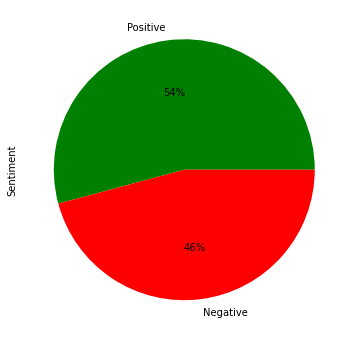

In [114]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [115]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tweet      1181 non-null   object 
 1   Avg        1181 non-null   float64
 2   Sentiment  1181 non-null   object 
dtypes: float64(1), object(2)
memory usage: 27.8+ KB


In [116]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 2].values

In [117]:
processed_features

array(['say far best custom care servic ever receiv appstor',
       'io 7 frick smooth beauti thanxappl', 'love u', ...,
       'freak cow freak', 'hate phone work im go freak',
       'agounalaki that nasti nasti brat'], dtype=object)

In [118]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [120]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:

pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head()

,5c,5s,7evenstarz,actual,ad,alreadi,alway,amaz,amazon,android,...,wow,wtf,ya,yall,ye,year,yet,yo,yooo,your
742,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.000000,0.820050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.000000,0.820050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,0.820050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.398258,0.714602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test split

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

# Gaussian Naive Bayes

In [123]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [124]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [125]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7675544794188862
[[203 163]
 [ 29 431]]
              precision    recall  f1-score   support

    Negative       0.88      0.55      0.68       366
    Positive       0.73      0.94      0.82       460

    accuracy                           0.77       826
   macro avg       0.80      0.75      0.75       826
weighted avg       0.79      0.77      0.76       826



In [126]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6619718309859155
[[ 95  80]
 [ 40 140]]
              precision    recall  f1-score   support

    Negative       0.70      0.54      0.61       175
    Positive       0.64      0.78      0.70       180

    accuracy                           0.66       355
   macro avg       0.67      0.66      0.66       355
weighted avg       0.67      0.66      0.66       355



**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [127]:
Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear love new default alarm rington goodmorn
Name: Tweet, dtype: object

In [128]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [129]:
corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say far best custom care servic ever receiv ap...
1                      io 7 frick smooth beauti thanxappl
2                                                  love u
3       thank love new iphon 5s iphone5 pictwittercomx...
4                      best custom servic new phone 10min
                              ...                        
1176                                                freak
1177         cant freak see pictur tl annoy freak twitter
1178                                      freak cow freak
1179                             hate phone work go freak
1180                          agounalaki nasti nasti brat
Name: Tweet, Length: 1181, dtype: object

In [130]:
wc_a = ' '.join(corpus)

In [131]:
wc_a

'say far best custom care servic ever receiv appstor io 7 frick smooth beauti thanxappl love u thank love new iphon 5s iphone5 pictwittercomxmhjcu4pcb best custom servic new phone 10min ear pod amaz best sound inear headphon ive ever omg iphon 5s cool read finger print unlock iphon 5s make purchas without passcod iphon 5c beauti 3 attributeownership exactli alway one market market busi innov fb check spec new io 7wow say cant wait new updat bravo love new io much thnx phillydvib cant wait iphone5 v2vista fingerprint scanner killer featur iphon 5s bloodi brilliant timesnow httptoiinw0o3z interest mani peopl seem almost demis go still far favorit brand fantast love bnbuzz nookstudi nookbn made life much easier morn watch keynot latest iphon love iphone5 iphone5c guess christma gift alreadi iphon wasnt call correctli went store first time told gave brand new phone wow great job provid best user experi thinkauto swap galaxys2 iphone4 one day id say convert cant wait orang phone upgrad nove

In [133]:
pip install WordCloud

In [134]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 

Word Cloud for Apple_Tweets (after cleaning)!!


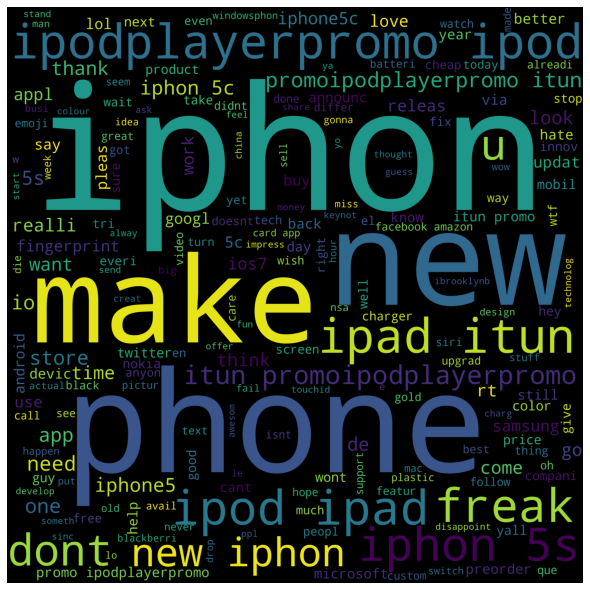

In [135]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

# END